In [2]:
# import dependencies
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import cv2

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display, Javascript, Image

from base64 import b64decode, b64encode
import PIL
import io
import html
import time

<Figure size 2000x2000 with 0 Axes>

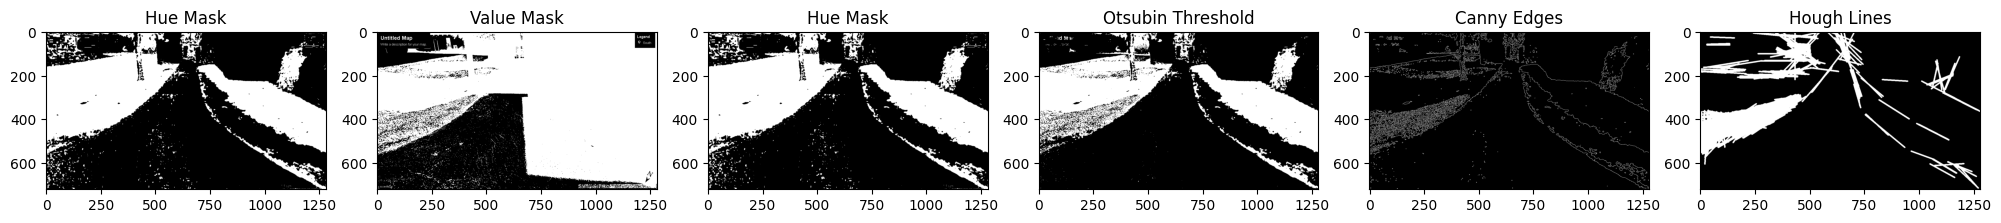

: 

In [16]:
# Read the IMage
image = cv2.imread('./Sidewalks/P1.jpg',cv2.IMREAD_UNCHANGED)

# Convert BGR image to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Splitting the HSV image into its components
h, s, v = cv2.split(hsv)

# Define lower and upper thresholds for value segmentation
lower_value_threshold = 0
upper_value_threshold = 150 

# Define lower and upper thresholds for value segmentation
lower_hue_threshold = 30
upper_hue_threshold = 90 

# Create a binary mask based on value thresholds
value_mask = cv2.inRange(v, lower_value_threshold, upper_value_threshold)

# Create a binary mask based on hue thresholds
hue_mask = cv2.inRange(h, lower_hue_threshold, upper_hue_threshold)

# Combine the value and hue mask
composite_mask = cv2.bitwise_and(value_mask, hue_mask)

# Apply the mask to the original image to remove shadows
segmented_image = cv2.bitwise_and(image, image, mask=composite_mask) 

# Convert Image to Grayscale
img_gry = cv2.cvtColor(segmented_image,cv2.COLOR_BGR2GRAY)

# Equalize the contrast of the image
equalized = cv2.equalizeHist(img_gry)

# Apply Gaussian blurring
img_blur = cv2.GaussianBlur(equalized, (5,5), 0) 

# Apply Otsubin thresholding
ret, img_Otsubin = cv2.threshold(img_gry,10,255,cv2.THRESH_BINARY)

imagetocanny = img_Otsubin

edges = cv2.Canny(image=imagetocanny, threshold1=200, threshold2=200) # Canny Edge Detection


'''
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 100  # minimum number of pixels making up a line
max_line_gap = 30  # maximum gap in pixels between connectable line segments
line_image = np.copy(img_Otsubin) * 0  # creating a blank to draw lines on
'''

line_image = np.copy(img_Otsubin) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image. Output lines are an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, 1, np.pi/100, 15, np.array([]),
                    100, 30)

for line in lines:
    for x1,y1,x2,y2 in line:
      cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
plt.figure(figsize = (20,20))


plt.figure(figsize=(20, 5))


plt.subplot(1, 6, 1)
plt.imshow(hue_mask, cmap='gray')
plt.title('Hue Mask')

plt.subplot(1, 6, 2)
plt.imshow(value_mask, cmap='gray')
plt.title('Value Mask')

plt.subplot(1, 6, 3)
plt.imshow(hue_mask, cmap='gray')
plt.title('Hue Mask')

plt.subplot(1, 6, 4)
plt.imshow(img_Otsubin, cmap='gray')
plt.title('Otsubin Threshold')

plt.subplot(1, 6, 5)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')

plt.subplot(1, 6, 6)
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Hough Lines')

plt.tight_layout()
plt.show()


In [3]:
# define a video capture object edit the number to find the webcam
vid = cv2.VideoCapture(0) 
  
while(True): 
      
    # Capture the video frame 
    # by frame 
    ret, image = vid.read() 
    # Read the Image
    
    # Convert BGR image to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Splitting the HSV image into its components
    h, s, v = cv2.split(hsv)

    # Define lower and upper thresholds for value segmentation
    lower_value_threshold = 0
    upper_value_threshold = 150 

    # Define lower and upper thresholds for value segmentation
    lower_hue_threshold = 30
    upper_hue_threshold = 90 

    # Create a binary mask based on value thresholds
    value_mask = cv2.inRange(v, lower_value_threshold, upper_value_threshold)

    # Create a binary mask based on hue thresholds
    hue_mask = cv2.inRange(h, lower_hue_threshold, upper_hue_threshold)

    # Combine the value and hue mask
    composite_mask = cv2.bitwise_and(value_mask, hue_mask)

    # Apply the mask to the original image to remove shadows
    segmented_image = cv2.bitwise_and(image, image, mask=composite_mask) 

    # Convert Image to Grayscale
    img_gry = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

    # Equalize the contrast of the image
    equalized = cv2.equalizeHist(img_gry)

    # Apply Gaussian blurring
    img_blur = cv2.GaussianBlur(equalized, (5,5), 0) 

    # Apply Otsubin thresholding
    ret, img_Otsubin = cv2.threshold(img_gry,10,255,cv2.THRESH_BINARY)

    imagetocanny = img_Otsubin

    edges = cv2.Canny(image=imagetocanny, threshold1=200, threshold2=200) # Canny Edge Detection


    '''
    rho = 1  # distance resolution in pixels of the Hough grid
    theta = np.pi / 180  # angular resolution in radians of the Hough grid
    threshold = 15  # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 100  # minimum number of pixels making up a line
    max_line_gap = 30  # maximum gap in pixels between connectable line segments
    line_image = np.copy(img_Otsubin) * 0  # creating a blank to draw lines on
    '''

    line_image = np.copy(img_Otsubin) * 0  # creating a blank to draw lines on

    # Run Hough on edge detected image. Output lines are an array containing endpoints of detected line segments
    lines = cv2.HoughLinesP(edges, 1, np.pi/100, 15, np.array([]),
                        100, 30)

    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(image,(x1,y1),(x2,y2),(255,0,0),5)

  
    # Display the resulting frame 
    cv2.imshow('frame', image) 
      
    # the 'q' button is set as the 
    # quitting button you may use any 
    # desired button of your choice 
    if cv2.waitKey(1) & 0xFF == ord('q'): 
        break
  
# After the loop release the cap object 
vid.release() 
# Destroy all the windows 
cv2.destroyAllWindows() 



TypeError: 'NoneType' object is not iterable

: 